In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库

In [2]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
        name = data_['接单时间']
        list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [3]:
lujing = r'C:\Users\Administrator\datas\艾尚花语\活动&单门店\七夕\七夕订单.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [4]:
lujing = r'C:\Users\Administrator\datas\艾尚花语\活动&单门店\七夕\问题订单.csv'
code = 'gbk'
wrong = improt_data(lujing,code)

In [5]:
data[data['是否预订单'] == '是']['订单编号'].count()

623

# data   wrong下单时间类型转换


In [214]:
data['下单时间'] = pd.to_datetime(data['下单时间'],format='%Y-%m-%d %H:%M:%S')


In [215]:
wrong['下单时间'] = pd.to_datetime(wrong['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [216]:
data['下单时间'].count()

4528

# wrong用户催单  485

In [217]:
wrong['下单时间'].count()

634

In [218]:
wrong['订单编号'].count()
wrong[wrong['商家服务问题']=='用户催单；\t']['订单编号'].count()

485

In [219]:
drop_du(wrong,'商家服务问题')

[['拣货超时；用户催单；\t',
  '拣货超时；\t',
  '商家少送错送；\t',
  '缺货导致退款；\t',
  '商家超时未接单；\t',
  '商家拒单；\t',
  '用户催单；\t'],
 {'拣货超时；用户催单；\t': 3,
  '拣货超时；\t': 27,
  '商家少送错送；\t': 7,
  '缺货导致退款；\t': 18,
  '商家超时未接单；\t': 34,
  '商家拒单；\t': 56,
  '用户催单；\t': 485},
 ['商家少送错送；用户催单；\t', '缺货导致退款；用户催单；\t', '质量问题导致退款；用户催单；\t', '商家拒单；用户催单；\t']]

In [220]:
wrong.head()


,订单编号,下单时间,店铺名称,店铺ID,店铺所在城市,订单总金额（元）,退款金额（元）,退款商品,商家服务问题
0,92953251165886577,2020-08-25 17:46:31,"美家鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9295325,岳阳\t,259.0,0.0,NaN,用户催单；\t
1,90433172718691708,2020-08-25 12:00:09,"花坞鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9043317,福州\t,259.0,0.0,NaN,用户催单；\t
2,93520763982058332,2020-08-25 11:40:32,"花仙子鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9352076,西安\t,329.0,0.0,NaN,用户催单；\t
3,92238720408368023,2020-08-25 08:26:34,"天天花坊鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9223872,郴州\t,259.0,0.0,NaN,用户催单；\t
4,92953250678856768,2020-08-25 18:24:03,"美家鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9295325,岳阳\t,1319.0,0.0,NaN,用户催单；\t


# 三种订单数量

In [221]:
data.drop_duplicates(subset='订单状态',keep='last',inplace=False)['订单状态']

4514    订单已处理
4526     订单完成
4527     订单取消
Name: 订单状态, dtype: object

In [222]:
data_quxiao = data[data['订单状态'] == '订单取消']


# 合并 136 

In [236]:
data_quxiao_wrong = pd.merge(data_quxiao,wrong,on= ['订单编号'])
data_quxiao_wrong['订单编号'].count()
data_quxiao_wrong

,日期,订单编号,下单时间_x,接单时长,店铺名称_x,店铺ID_x,店铺所在城市_x,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_y,店铺名称_y,店铺ID_y,店铺所在城市_y,订单总金额（元）,退款金额（元）,退款商品,商家服务问题
0,\t20200824-20200826,90242783152492135,2020-08-25 18:08:11,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单取消,用户提交订单,否,259.0,189.0,0.0,75.0,约惠七夕\t,【清新海歌】11枝香槟玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0402\t,1,259.0,189.0,70.0,70.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【清新海歌】11枝香槟玫瑰鲜花花束-七夕节表...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,2020-08-25 18:08:11,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,259.0,259.0,【清新海歌】11枝香槟玫瑰鲜花花束-七夕节表白鲜花*数量1\t,商家超时未接单；\t
1,\t20200824-20200826,90242783982058332,2020-08-25 09:37:36,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单取消,用户提交订单,否,298.0,175.0,0.0,128.0,爱意表达\t,【爱如初恋】11枝红玫瑰鲜花花束,NaN,as0013\t,1,259.0,139.0,120.0,120.0,0.0,否,0,0.0,0.0,39.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【爱如初恋】11枝红玫瑰鲜花花束原价259....,否,未回复,NaN,0.00分,0.0,NaN,其他\t,2020-08-25 09:37:36,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,298.0,298.0,【爱如初恋】11枝红玫瑰鲜花花束*数量1\t,商家超时未接单；\t
2,\t20200824-20200826,90242783968253920,2020-08-25 09:49:06,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单取消,用户提交订单,否,517.0,244.0,0.0,278.0,爱意表达\t,【初识你名】33枝粉玫瑰鲜花花束,NaN,as0052\t,1,509.0,239.0,270.0,270.0,0.0,否,0,0.0,0.0,8.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【初识你名】33枝粉玫瑰鲜花花束原价509....,否,未回复,NaN,0.00分,0.0,NaN,其他\t,2020-08-25 09:49:06,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,517.0,517.0,【初识你名】33枝粉玫瑰鲜花花束*数量1\t,商家超时未接单；\t
3,\t20200824-20200826,90433103049752078,2020-08-24 17:53:50,0秒,"元寳花店鲜花礼品鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9043310,长春\t,在线支付,订单取消,用户提交订单,是,509.0,220.0,0.0,294.0,约惠七夕\t,【不变女神】33枝红玫瑰鲜花礼盒-七夕节表白鲜花,NaN,sku变更ashy0426\t,1,509.0,220.0,289.0,289.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【不变女神】33枝红玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,2020-08-24 17:53:50,"元寳花店鲜花礼品鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9043310,长春\t,509.0,509.0,【不变女神】33枝红玫瑰鲜花礼盒-七夕节表白鲜花*数量1\t,商家超时未接单；\t
4,\t20200824-20200826,90433130062270945,2020-08-25 18:45:02,4秒,"浪漫主题花艺(七夕节预定,生日鲜花，表白鲜花)\t",9043313,佳木斯\t,在线支付,订单取消,用户提交订单,否,259.0,126.0,0.0,138.0,约惠七夕\t,【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0394\t,1,259.0,126.0,133.0,133.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,2020-08-25 18:45:02,"浪漫主题花艺(七夕节预定,生日鲜花，表白鲜花)\t",9043313,佳木斯\t,259.0,259.0,【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白鲜花*数量1\t,商家拒单；\t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,\t20200824-20200826,97688043123430734,2020-08-25 15:33:37,176秒,"花旺·七夕节鲜花,表白鲜花\t",9768804,怀化\t,在线支付,订单取消,用户提交订单,否,279.0,210.0,0.0,74.0,毕业季\t,【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕业季花礼,NaN,as0280\t,1,279.0,210.0,69.0,69.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,2020-08-25 15:33:37,"花旺·七夕节鲜花,表白鲜花\t",9768804,怀化\t,279.0,279.0,【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕业季花礼*数量1\t,商家拒单；\t
132,\t20200824-20200826,97868112718691708,2020-08-25 18:43:12,0秒,"欢聚缘婚礼·七夕节鲜花,表白鲜花\t",9786811,朔州\t,在线支付,订单取消,用户提交订单,否,339.0,196.0,0.0,148.0,约惠七夕\t,【卿本佳人】19枝粉玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0416\t,1,329.0,189.0,140.0,140.0,0.0,否,0,0.0,0.0,10.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【卿本佳人】19枝粉玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,2020-08-25 18:43:12,"欢聚缘婚礼·七夕节鲜花,表白鲜花\t",9786811,朔州\t,339.0,339.0,【卿本佳人】19枝粉玫瑰鲜花礼盒-七夕节表白鲜花*数量1\t,商家超时未接单；\t
133,\t20200824-20200826,97895431795091754,2020-08-25 08:20:08,0秒,"遇见花艺·七夕节鲜花,表白鲜花\t",9789543,长沙\t,在线支付,订单取消,用户提交订单,否,329.0,146.0,0.0,188.0,约惠七夕\t,【暗里着迷】19枝粉玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0386\t,1,329.0,146.0,183.0,183.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【暗里着迷】19枝粉玫瑰鲜花花束-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,2020-08-25 08:20:08,"遇见花艺·七夕节鲜花,表白鲜花\t",9789543,长沙\t,329.0,329.0,【暗里着迷】19枝粉玫瑰鲜花花束-七夕节表白鲜花*数量1\t,商家拒单；\t
134,\t20200824-20200826,97895430408368023,2020-08-25 03:10:43,0秒,"遇见花艺·七夕节鲜花,表

In [237]:
data_quxiao_wrong[data_quxiao_wrong['商品实付销售额'] <= 10]['下单时间_x']

9     2020-08-25 08:53:45
77    2020-08-25 16:47:44
82    2020-08-24 22:35:06
86    2020-08-25 18:32:45
98    2020-08-24 15:11:08
114   2020-08-25 09:04:11
Name: 下单时间_x, dtype: datetime64[ns]

In [227]:
data[data['商品实付销售额'] <= 10]['订单编号'].count()

253

In [224]:
data_quxiao_wrong_list = list(data_quxiao_wrong['商家服务问题'])
# data_quxiao_wrong_list

In [156]:
from collections import Counter  
a = len(data_quxiao_wrong_list)
collection_a = Counter(data_quxiao_wrong_list)
print('一共 %d 条数据' % a)
print(collection_a)

一共 136 条数据
Counter({'商家拒单；\t': 61, '商家超时未接单；\t': 35, '缺货导致退款；\t': 17, '用户催单；\t': 15, '商家少送错送；\t': 5, '缺货导致退款；用户催单；\t': 1, '质量问题导致退款；用户催单；\t': 1, '商家拒单；用户催单；\t': 1})


In [157]:
data_quxiao_list = list(data_quxiao['订单取消原因（仅取消订单）'])
a = len(data_quxiao_list)
collection_c= Counter(data_quxiao_list)
print('一共 %d 条数据' % a)
print(collection_c)

一共 501 条数据
Counter({'其他\t': 501})


# quxiao  wrong  是否预定单

In [158]:

drop_du(data,'是否预订单')

[['是', '否'], {'是': 623, '否': 3905}, []]

In [159]:
drop_du(data_quxiao,'是否预订单')

[['是', '否'], {'是': 52, '否': 449}, []]

In [160]:
drop_du(data_quxiao_wrong,'是否预订单')

[['是', '否'], {'是': 14, '否': 122}, []]

In [161]:
# 预订单的  取消  问题 单 
data_quxiao_wrong_yuding  = data_quxiao_wrong[data_quxiao_wrong['是否预订单'] == '是']
data_quxiao_wrong_yuding_list = list(data_quxiao_wrong_yuding['店铺名称_x'])
b = len(data_quxiao_wrong_yuding_list)

collection_b = Counter(data_quxiao_wrong_yuding_list)
data_quxiao_wrong_yuding_list
print(collection_b)

Counter({'八度花艺(七夕节预定,生日鲜花，表白鲜花)\t': 2, '浪漫花都鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, 'MINE FUN鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '锦上添花·七夕节鲜花,表白鲜花\t': 2, '元寳花店鲜花礼品鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 1, '圣格花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 1, '木子花开鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 1, '依依花语鲜花礼品鲜花店\t': 1, '一花一木鲜花礼品鲜花店\t': 1, '遇见花艺·七夕节鲜花,表白鲜花\t': 1})


In [162]:
# 非预订单  取消  问题  单
data_quxiao_wrong_yuding_list = list(data_quxiao_wrong['店铺名称_x'])
b = len(data_quxiao_wrong_yuding_list)
collection_b = Counter(data_quxiao_wrong_yuding_list)
print(collection_b)

Counter({'梦真花卉鲜花礼品鲜花店\t': 6, '君之吻花坊\t': 6, '海霞花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 5, '99花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 4, '天长地久鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 4, '永恒花艺生活馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 4, 'MINE FUN鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 4, '依依花语鲜花礼品鲜花店\t': 4, '牵手花艺鲜花礼品鲜花店\t': 4, '颜汇永丰鲜花(七夕节预定,生日鲜花，表白鲜花)\t': 4, '锦上添花·七夕节鲜花,表白鲜花\t': 4, '友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t': 3, '流星花園鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '长华花店鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '如意鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '浪漫花都鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '馨梦鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '兰心阁花坊·七夕节鲜花,表白鲜花\t': 3, '八度花艺(七夕节预定,生日鲜花，表白鲜花)\t': 2, '柔怡鲜花鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '大拇指婚庆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '芳香缘鲜花批发(七夕节预定,生日鲜花，表白鲜花)\t': 2, '拾花间鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '先花店鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '爱美鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '鲜花朵朵鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '品茗鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '木子花开鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '芳源鲜花礼品鲜花店\t': 2, '心语鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '遇见花艺·七夕节鲜花,表白鲜花\t': 2, '元寳花店鲜花礼品鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 1, '浪漫主题花艺(七夕节预定,生日鲜花，表白鲜花)\t': 1, '茗蔓花艺(七

In [163]:
data_quxiao_wrong = list(data_quxiao_wrong['店铺名称_x'])
b = len(data_quxiao_wrong)
collection_b = Counter(data_quxiao_wrong)
print(collection_b)

Counter({'梦真花卉鲜花礼品鲜花店\t': 6, '君之吻花坊\t': 6, '海霞花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 5, '99花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 4, '天长地久鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 4, '永恒花艺生活馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 4, 'MINE FUN鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 4, '依依花语鲜花礼品鲜花店\t': 4, '牵手花艺鲜花礼品鲜花店\t': 4, '颜汇永丰鲜花(七夕节预定,生日鲜花，表白鲜花)\t': 4, '锦上添花·七夕节鲜花,表白鲜花\t': 4, '友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t': 3, '流星花園鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '长华花店鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '如意鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '浪漫花都鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '馨梦鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 3, '兰心阁花坊·七夕节鲜花,表白鲜花\t': 3, '八度花艺(七夕节预定,生日鲜花，表白鲜花)\t': 2, '柔怡鲜花鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '大拇指婚庆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '芳香缘鲜花批发(七夕节预定,生日鲜花，表白鲜花)\t': 2, '拾花间鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '先花店鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '爱美鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '鲜花朵朵鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '品茗鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '木子花开鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '芳源鲜花礼品鲜花店\t': 2, '心语鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 2, '遇见花艺·七夕节鲜花,表白鲜花\t': 2, '元寳花店鲜花礼品鲜花店(七夕节预定,生日鲜花，表白鲜花)\t': 1, '浪漫主题花艺(七夕节预定,生日鲜花，表白鲜花)\t': 1, '茗蔓花艺(七

In [164]:
data_quxiao['接单时间'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]
data['接单时间'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]

<ipython-input-164-5f371c9bc4a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_quxiao['接单时间'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]


In [165]:
# data_quxiao.to_csv('取消订单.csv')
# data.to_csv('data.csv')

In [166]:
data_quxiao

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,接单时间
7,\t20200824-20200826,90242781269807160,2020-08-24 03:49:22,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单取消,用户提交订单,是,547.0,331.00,0.0,221.00,约惠七夕\t,【心心相惜】36枝粉玫瑰鲜花礼盒-七夕节表白鲜花,NaN,as0059\t,1,519.0,306.00,213.00,213.00,0.0,否,0,0.0,0.0,28.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【心心相惜】36枝粉玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,0
24,\t20200824-20200826,90242784235444324,2020-08-24 22:01:11,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单取消,用户提交订单,是,259.0,126.00,0.0,138.00,约惠七夕\t,【花开相爱】11枝红玫瑰鲜花花束-七夕节表白鲜花,NaN,as0022\t,1,259.0,126.00,133.00,133.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【花开相爱】11枝红玫瑰鲜花花束-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,0
26,\t20200824-20200826,90242783892506751,2020-08-25 09:09:13,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单取消,用户提交订单,否,357.0,206.99,0.0,155.01,约惠七夕\t,【此情不渝】11枝蓝色妖姬鲜花礼盒（真花上色）,NaN,as0026\t,1,329.0,196.08,132.92,132.92,0.0,否,0,0.0,0.0,8.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【此情不渝】11枝蓝色妖姬鲜花礼盒（真花上色...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,0
27,\t20200824-20200826,90242783892506751,2020-08-25 09:09:13,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单取消,用户提交订单,否,357.0,206.99,0.0,155.01,购买须知\t,【许愿灯】点亮人生 单拍不送,NaN,ashy0383\t,1,20.0,5.91,14.09,14.09,0.0,否,0,0.0,0.0,8.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【此情不渝】11枝蓝色妖姬鲜花礼盒（真花上色...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,0
30,\t20200824-20200826,90242783152492135,2020-08-25 18:08:11,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单取消,用户提交订单,否,259.0,189.00,0.0,75.00,约惠七夕\t,【清新海歌】11枝香槟玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0402\t,1,259.0,189.00,70.00,70.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【清新海歌】11枝香槟玫瑰鲜花花束-七夕节表...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,\t20200824-20200826,97972872620144691,2020-08-24 22:09:39,455秒,"盈瑞鲜花·七夕节鲜花,表白鲜花\t",9797287,沈阳\t,在线支付,订单取消,用户提交订单,否,259.0,133.00,0.0,131.00,约惠七夕\t,【怦然心动】11枝粉玫瑰鲜花网红礼盒-七夕节表白鲜花,NaN,ashy0399\t,1,259.0,133.00,126.00,126.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【怦然心动】11枝粉玫瑰鲜花网红礼盒-七夕节...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,455
4499,\t20200824-20200826,97989173966510833,2020-08-24 23:49:27,230秒,"FLOWER意达·七夕节鲜花,表白鲜花\t",9798917,辽阳\t,在线支付,订单取消,用户提交订单,否,259.0,126.00,0.0,138.00,约惠七夕\t,【花开相爱】11枝红玫瑰鲜花花束-七夕节表白鲜花,NaN,as0022\t,1,259.0,126.00,133.00,133.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【花开相爱】11枝红玫瑰鲜花花束-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,230
4506,\t20200824-20200826,97989172141837702,2020-08-25 10:56:27,202秒,"FLOWER意达·七夕节鲜花,表白鲜花\t",9798917,辽阳\t,在线支付,订单取消,用户提交订单,否,509.0,236.00,0.0,278.00,爱意表达\t,【怦然心动】33枝红玫瑰黑纱鲜花花束,NaN,as0047\t,1,509.0,236.00,273.00,273.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【怦然心动】33枝红玫瑰黑纱鲜花花束原价50...,是,未回复,NaN,0.00分,0.0,NaN,其他\t,202
4520,\t20200824-20200826,98110693470084206,2020-08-25 14:28:24,0秒,girl花坊\t,9811069,南京\t,在线支付,订单取消,用户提交订单,否,279.0,146.00,0.0,138.00,毕业季\t,【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕业季花礼,NaN,as0280\t,1,279.0,146.00,133.00,133.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,0


In [167]:
a = wenzi(data,'订单完成','订单状态')
from numpy import *
list_time = []
for i in a[1]:
    a = type(i)
    a = str(a)
    if a == "<class 'float'>":
        i = 0
#     print(i)
    j = int(i)
    list_time.append(j)
print('data平均接单时间%f秒' %mean(list_time))

关于“订单完成”的订单数量是： 3493
data平均接单时间4.228357秒


In [168]:
a = wenzi(data_quxiao,'订单取消','订单状态')
from numpy import *
list_time = []
for i in a[1]:
#     print(i)
    j = int(i)
    list_time.append(j)
print('取消平均接单时间%f秒' %mean(list_time))

关于“订单取消”的订单数量是： 501
取消平均接单时间38.215569秒


In [169]:
a = wenzi(data_quxiao_wrong,'订单取消','订单状态')
from numpy import *
list_time = []
for i in a[1]:
#     print(i)
    j = int(i)
    list_time.append(j)
print('取消平均接单时间%f秒' %mean(list_time))

AttributeError: 'list' object has no attribute 'iterrows'

In [ ]:
data_quxiao['接单时间'] = data_quxiao['接单时间'].astype(int)

data.fillna(0,inplace=True)
data['接单时间'] = data['接单时间'].astype(int)

KeyError: "None of [Index(['接单时间'], dtype='object')] are in the [columns]"

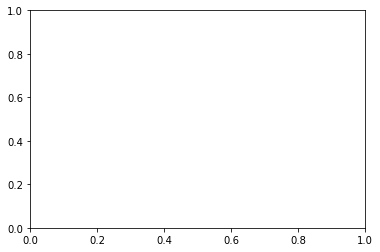

In [170]:
data_quxiao.boxplot('接单时间')

KeyError: "None of [Index(['接单时间'], dtype='object')] are in the [columns]"

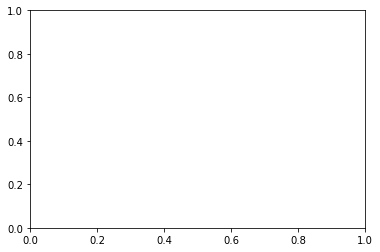

In [171]:
data.boxplot('接单时间')

In [ ]:
Q1 = np.percentile(data_quxiao['接单时间'], 25)
Q3 = np.percentile(data_quxiao['接单时间'], 75)
Q2 = np.percentile(data_quxiao['接单时间'], 50)
IQ = Q3 - Q1

In [172]:
Q4 = Q3 + 1.5*IQ
print(Q4)

47.0


In [173]:
print(Q3)

20.0


In [174]:
print(Q2)

9.0


In [175]:
data_quxiao['接单时间'].mean()

inf

# 查看三种店铺情况

In [176]:
data

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,接单时间
0,\t20200824-20200826,90242751795091754,2020-08-25 21:50:30,172秒,"花韵花艺馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9024275,郑州\t,在线支付,订单已处理,配送中,否,259.0,140.0,0.0,124.0,约惠七夕\t,【未来可期】11枝香槟玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0417\t,1,259.0,140.0,119.0,119.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【未来可期】11枝香槟玫瑰鲜花礼盒-七夕节表...,否,未回复,NaN,0.00分,0.0,NaN,NaN,NaN
1,\t20200824-20200826,90242750408368023,2020-08-25 10:55:55,166秒,"花韵花艺馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9024275,郑州\t,在线支付,订单完成,配送中,否,299.0,190.0,0.0,114.0,向日葵花语\t,【绝代佳人】3枝向日葵+11枝香槟玫瑰韩式鲜花花束,NaN,as0102\t,1,299.0,190.0,109.0,109.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满69.0元赠精美贺卡下单备注贺卡内容*1/门店新客立减9.0...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:49:22\t,NaN,NaN
2,\t20200824-20200826,90242753470084206,2020-08-25 11:16:26,142秒,"花韵花艺馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9024275,郑州\t,在线支付,订单完成,配送中,否,259.0,170.0,0.0,94.0,约惠七夕\t,【青春不悔】19枝香槟玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0425\t,1,259.0,170.0,89.0,89.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【青春不悔】19枝香槟玫瑰鲜花花束-七夕节表...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:57:17\t,NaN,NaN
3,\t20200824-20200826,90242752386186755,2020-08-25 17:56:05,167秒,"花韵花艺馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9024275,郑州\t,在线支付,订单完成,用户提交订单,否,329.0,160.0,0.0,174.0,毕业季\t,【盛夏】19枝粉玫瑰鲜花花束毕业季花礼,NaN,as0283\t,1,329.0,160.0,169.0,169.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【盛夏】19枝粉玫瑰鲜花花束毕业季花礼原价3...,否,已回复,NaN,0.00分,0.0,2020-08-25 18:43:35\t,NaN,NaN
4,\t20200824-20200826,90242782800320932,2020-08-24 17:22:22,54秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单完成,配送中,否,318.0,179.0,0.0,144.0,毕业季\t,【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕业季花礼,NaN,as0280\t,1,279.0,143.0,136.0,136.0,0.0,否,0,0.0,0.0,39.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕...,否,未回复,NaN,0.00分,0.0,2020-08-24 23:46:31\t,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,\t20200824-20200826,98113453470084206,2020-08-25 09:55:35,40秒,玫瑰花店\t,9811345,怀化\t,在线支付,订单完成,配送中,否,259.0,126.0,0.0,138.0,约惠七夕\t,【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0390\t,1,259.0,126.0,133.0,133.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:04:32\t,NaN,NaN
4524,\t20200824-20200826,98113452386186755,2020-08-25 09:58:17,41秒,玫瑰花店\t,9811345,怀化\t,在线支付,订单完成,配送中,否,259.0,126.0,0.0,138.0,约惠七夕\t,【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0394\t,1,259.0,126.0,133.0,133.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:11:15\t,NaN,NaN
4525,\t20200824-20200826,98113451795091754,2020-08-25 17:07:55,140秒,玫瑰花店\t,9811345,怀化\t,在线支付,订单完成,用户提交订单,否,259.0,136.0,0.0,128.0,约惠七夕\t,【怦然心动】11枝红玫瑰鲜花网红礼盒-七夕节表白鲜花,NaN,ashy0400\t,1,259.0,136.0,123.0,123.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【怦然心动】11枝红玫瑰鲜花网红礼盒-七夕节...,否,未回复,NaN,0.00分,0.0,2020-08-25 23:37:16\t,NaN,NaN
4526,\t20200824-20200826,98113451677285159,2020-08-25 17:19:50,140秒,玫瑰花店\t,9811345,怀化\t,在线支付,订单完成,用户提交订单,否,329.0,146.0,0.0,188.0,约惠七夕\t,【如梦】19枝红玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0403\t,1,329.0,146.0,183.0,183.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【如梦】19枝红玫瑰鲜花花束-七夕节表白鲜花...,否,未回复,NaN,0.00分,0.0,2020-08-25 23:35:01\t,NaN,NaN


In [177]:
a = drop_du(data,'店铺名称')
temp = sorted(a[1].items(), key=lambda x: x[1], reverse=True)
tempre

NameError: name 'tempre' is not defined

In [178]:
b = drop_du(data_quxiao,'店铺名称')
temp = sorted(b[1].items(), key=lambda x: x[1], reverse=True)
temp

[('友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t', 12),
 ('海霞花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 11),
 ('锦上添花·七夕节鲜花,表白鲜花\t', 11),
 ('MINE FUN鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 10),
 ('依依花语鲜花礼品鲜花店\t', 9),
 ('梦真花卉鲜花礼品鲜花店\t', 9),
 ('颜汇永丰鲜花(七夕节预定,生日鲜花，表白鲜花)\t', 9),
 ('花间密码鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 8),
 ('牵手花艺鲜花礼品鲜花店\t', 8),
 ('君之吻花坊\t', 8),
 ('八度花艺(七夕节预定,生日鲜花，表白鲜花)\t', 7),
 ('倾城鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 7),
 ('馨梦鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 7),
 ('花间时光(七夕节预定,生日鲜花，表白鲜花)\t', 6),
 ('欣然鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 6),
 ('拾花间鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 6),
 ('花王花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 6),
 ('兰心阁花坊·七夕节鲜花,表白鲜花\t', 6),
 ('柔怡鲜花鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('花仙子\t', 5),
 ('姐妹鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('流星花園鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('长华花店鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('花开相爱鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('茂业花店鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('千千惠鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('花仙子鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('繁花花坊鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('俊萍花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('爱美鲜花店(七夕节预定,生日鲜花，表白鲜花)\t', 5),
 ('鲜花朵朵鲜花店(七夕节预定,生日鲜花，表白鲜花)\t

In [181]:
c = drop_du(data_quxiao_wrong,'店铺名称_x')
temp = sorted(c[1].items(), key=lambda x: x[1], reverse=True)
temp

AttributeError: 'list' object has no attribute 'drop_duplicates'

# 七夕订单上涨幅度

In [182]:
data['下单时间1'] = data['下单时间'].dt.day
data['下单时间2'] = data['下单时间'].dt.hour


In [183]:
data_day_24 = data[data['下单时间1'] == 24]
data_day_25 = data[data['下单时间1'] == 25]

In [184]:
data[data['订单状态'] == '订单取消']['下单时间'].count()

501

In [185]:
data_day_24['下单时间'].count()
data_day_24[data_day_24['订单状态'] == '订单取消']['下单时间'].count()

70

In [186]:
data_day_25['下单时间'].count()
data_day_25[data_day_25['订单状态'] == '订单取消']['下单时间'].count()

431

In [187]:
a = drop_du(data_day_24,'下单时间2')
collection_d = Counter(a[1])
print(collection_d)


Counter({23: 98, 22: 93, 21: 88, 19: 71, 15: 66, 17: 65, 16: 61, 18: 56, 20: 56, 14: 45, 11: 43, 12: 42, 13: 42, 10: 33, 9: 23, 8: 17, 7: 7, 6: 7, 1: 4, 5: 4, 2: 3, 3: 3})


In [188]:
b = drop_du(data_day_25,'下单时间2')
collection_e = Counter(b[1])
print(collection_e)

Counter({9: 375, 10: 340, 11: 324, 12: 315, 13: 291, 8: 269, 15: 251, 14: 241, 16: 227, 17: 185, 18: 166, 19: 146, 7: 110, 20: 82, 21: 60, 0: 56, 6: 44, 22: 43, 1: 18, 5: 15, 2: 14, 3: 14, 4: 11, 23: 3})


In [189]:
df24 = pd.DataFrame(pd.Series(a[1]), columns=['count'])
df24 = df24.reset_index().rename(columns={'index':'time'})
df24.sort_values("time",inplace=True)
df24['time'] = df24['time'].apply(str)


In [190]:
df25 = pd.DataFrame(pd.Series(b[1]), columns=['count'])
df25 = df25.reset_index().rename(columns={'index':'time'})
df25.sort_values("time",inplace=True)
df25['time'] = df25['time'].apply(str)


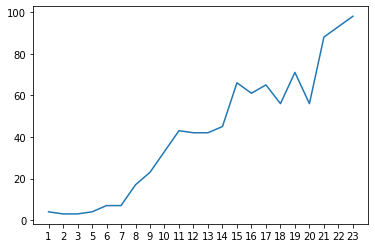

In [191]:
import matplotlib.pyplot as plt
plt.plot(df24['time'],df24['count'])


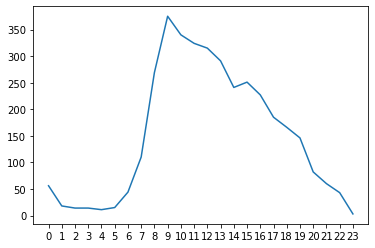

In [192]:
plt.plot(df25['time'],df25['count'])

In [193]:
lujing = r'C:\Users\Administrator\datas\艾尚花语\活动&单门店\七夕\七夕门店.csv'
code = 'gbk'
df = improt_data(lujing,code)

In [194]:
df1 = df[df['开始日期']  == 20200824]
df2 = df[df['开始日期']  == 20200825]

In [195]:
df1.sort_values('曝光人数',ascending=False)

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）
296,20200824,20200824,9529764,"花之坊鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,新疆维吾尔自治区,哈密地区,否,20200717,在线,11.0,10.7,4137,351,17,16,8.48,4.84%,18,16,5244.0,4370.01,868.99,0,0,0,0,0,0,0,0,0,18,0,0,18,15,83.33,13,0,0,5.0,5.0,5.0,0.0,NaN,NaN
24,20200824,20200824,9043996,"花间时光(七夕节预定,生日鲜花，表白鲜花)",鲜花组,河南省,许昌,否,20200508,在线,24.0,24.0,2190,151,12,11,6.89,7.95%,13,11,3249.0,1800.00,1504.00,0,0,0,0,0,0,0,0,0,12,0,0,4,4,100.00,4,0,0,5.0,5.0,5.0,0.0,NaN,NaN
36,20200824,20200824,9221240,"印象花坊鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,山东省,潍坊,否,20200602,在线,18.0,18.0,1918,162,10,10,8.45,6.17%,10,10,3970.0,2091.00,1929.00,0,0,0,0,0,0,0,0,0,10,0,0,4,4,100.00,4,0,0,5.0,5.0,5.0,0.0,NaN,NaN
170,20200824,20200824,9385115,"千千惠鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,山东省,临沂,否,20200623,在线,23.0,23.0,1855,191,12,12,10.30,6.28%,12,11,4629.0,2289.03,2506.97,0,0,0,0,0,0,0,0,0,12,0,0,6,6,100.00,3,0,0,4.9,4.9,5.0,0.0,NaN,NaN
396,20200824,20200824,9685750,"花语花卉鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,湖北省,襄阳,否,20200812,在线,17.0,17.0,1710,76,2,2,4.44,2.63%,2,2,578.0,317.00,271.00,0,0,0,0,0,0,0,0,0,2,0,0,4,4,100.00,2,0,0,5.0,5.0,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,20200824,20200824,9774419,"锦缘花艺·七夕节鲜花,表白鲜花",鲜花组,浙江省,杭州,否,20200819,在线,0.0,0.0,27,3,0,0,11.11,0%,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
158,20200824,20200824,9370710,戴氏花艺鲜花礼品鲜花店,鲜花组,山东省,临沂,否,20200708,在线,0.0,0.0,27,2,0,0,7.41,0%,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
118,20200824,20200824,9338707,"月月花屋鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,湖南省,邵阳,否,20200617,在线,0.0,0.0,20,0,0,0,0.00,0%,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN
66,20200824,20200824,9284178,"金缘鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,辽宁省,锦州,否,20200619,在线,0.0,0.0,18,0,0,0,0.00,0%,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN


In [196]:
Q1 = np.percentile(df2['有效订单数'], 25)
Q3 = np.percentile(df2['有效订单数'], 75)
Q2 = np.percentile(df2['有效订单数'], 50)
Q4 = Q3 + 1.5*IQ
IQ = Q3 - Q1

In [197]:
print(Q1)
print(Q2)
print(Q3)
print(Q4)

2.0
9.0
20.0
47.0


In [198]:
df2[df2['有效订单数'] >= 47]

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）
57,20200825,20200825,9266337,"群芳鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,江苏省,泰州,否,20200606,在线,15.0,12.9,1478,608,53,49,41.14,8.72%,52,50,15229.0,9377.99,6093.01,0,0,0,0,0,0,0,0,0,52,0,0,28,12,42.86,4,0,0,5.0,5.0,5.0,0.0,NaN,NaN


In [199]:
df2.corr()['IM回复率']

开始日期                    NaN
结束日期                    NaN
商家ID              -0.059988
首次上线日期            -0.033392
（日均）预设营业时长（h）      0.284144
（日均）在线营业时长（h）      0.247600
曝光人数               0.315985
入店人数               0.337543
下单人数               0.358482
下单新客人数             0.366018
入店转化率              0.272190
推单数                0.359611
有效订单数              0.365566
原价交易额              0.371847
实付交易额              0.366902
商家补贴金额             0.358109
商家原因取消订单数          0.045862
商家拒单数              0.035503
商家超时未接单数          -0.042711
商家取消不告知用户订单数            NaN
缺货导致退款订单数          0.113409
商家少送错送导致用户退款订单数    0.011266
商家质量问题导致用户退款订单数    0.049710
配送原因取消订单数          0.021841
拣货超时订单数            0.067204
使用间或完成按钮订单数        0.359002
平均骑手到店等待时间（min）    0.081526
平均骑手送货时长（min）      0.112428
IM会话数              0.318968
IM回复数              0.496490
IM回复率              1.000000
IM1分钟回复数           0.510291
差评订单数              0.120791
投诉订单数                   NaN
平均商家评分             0.277004
平均商品评分             0

In [200]:
df2.corr()['IM1分钟回复数']

开始日期                    NaN
结束日期                    NaN
商家ID              -0.067152
首次上线日期            -0.056517
（日均）预设营业时长（h）      0.237233
（日均）在线营业时长（h）      0.198527
曝光人数               0.437410
入店人数               0.702489
下单人数               0.771334
下单新客人数             0.775162
入店转化率              0.464504
推单数                0.764997
有效订单数              0.772340
原价交易额              0.779802
实付交易额              0.789890
商家补贴金额             0.723071
商家原因取消订单数          0.067790
商家拒单数              0.039153
商家超时未接单数           0.003286
商家取消不告知用户订单数            NaN
缺货导致退款订单数          0.137168
商家少送错送导致用户退款订单数   -0.060116
商家质量问题导致用户退款订单数    0.039579
配送原因取消订单数          0.161159
拣货超时订单数            0.299251
使用间或完成按钮订单数        0.759665
平均骑手到店等待时间（min）    0.272755
平均骑手送货时长（min）      0.234933
IM会话数              0.746833
IM回复数              0.871022
IM回复率              0.510291
IM1分钟回复数           1.000000
差评订单数              0.276284
投诉订单数                   NaN
平均商家评分             0.436604
平均商品评分             0

In [201]:
df25_max

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）
3,20200825,20200825,9024278,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)",鲜花组,陕西省,西安,否,20200508,在线,10.0,5.7,1552,284,33,20,18.30,11.62%,31,23,7012.0,4321.00,2798.00,3,0,3,0,0,0,0,0,0,28,0,0,29,25,86.21,5,0,0,4.8,4.8,4.6,0.0,NaN,NaN
11,20200825,20200825,9043313,"浪漫主题花艺(七夕节预定,生日鲜花，表白鲜花)",鲜花组,黑龙江省,佳木斯,否,20200508,在线,20.0,19.0,556,180,30,27,32.37,16.67%,31,27,8493.0,4120.98,4488.02,1,1,0,0,0,0,0,0,0,33,0,0,20,10,50.00,2,0,0,0.0,0.0,0.0,170.0,NaN,NaN
15,20200825,20200825,9043317,"花坞鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,福建省,福州,否,20200508,在线,10.0,9.3,1599,355,33,29,22.20,9.3%,31,29,8981.9,6109.91,3011.99,1,0,1,0,0,0,0,0,0,31,0,0,36,19,52.78,6,0,0,5.0,5.0,5.0,0.0,NaN,NaN
21,20200825,20200825,9043994,"八度花艺(七夕节预定,生日鲜花，表白鲜花)",鲜花组,河南省,许昌,否,20200508,在线,12.0,10.5,825,517,39,34,62.67,7.54%,40,35,10365.0,7408.98,3131.02,2,0,2,0,0,0,0,0,0,37,0,0,24,18,75.00,7,1,0,5.0,5.0,5.0,0.0,NaN,NaN
23,20200825,20200825,9043995,"情缘婚庆鲜花店(七夕节预定,生日鲜花，表白鲜花)",鲜花组,福建省,南平,否,20200508,在线,12.0,11.9,555,167,31,29,30.09,18.56%,31,29,9519.0,4932.03,4693.97,0,0,0,0,0,0,0,0,0,31,0,0,15,13,86.67,8,0,0,5.0,5.0,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,20200825,20200825,9756433,"鲜花绿植·七夕节鲜花,表白鲜花",鲜花组,北京市,北京,否,20200814,在线,17.0,16.6,3468,350,28,26,10.09,8%,28,26,7304.0,4895.00,2521.00,0,0,0,0,0,0,0,0,0,27,0,0,15,12,80.00,5,0,0,5.0,5.0,5.0,0.0,NaN,NaN
439,20200825,20200825,9756635,"小周鲜花屋·七夕节鲜花,表白鲜花",鲜花组,重庆市,重庆,否,20200818,在线,18.0,17.1,1437,360,46,45,25.05,12.78%,46,45,13185.0,7478.00,5927.00,0,0,0,0,0,0,0,0,0,46,0,0,24,18,75.00,10,0,0,0.0,0.0,0.0,0.0,NaN,NaN
441,20200825,20200825,9757599,"锦上添花·七夕节鲜花,表白鲜花",鲜花组,四川省,巴中,否,20200814,在线,17.0,14.1,1366,480,38,30,35.14,7.92%,38,30,9670.0,5099.00,4716.00,1,0,1,0,0,0,0,0,0,35,0,0,29,5,17.24,1,0,0,5.0,5.0,5.0,0.0,NaN,NaN
445,20200825,20200825,9762363,君之吻花坊,鲜花组,浙江省,杭州,否,20200815,在线,12.0,11.1,1284,173,37,27,13.47,21.39%,35,27,7811.0,4103.00,3813.00,4,4,0,0,0,0,0,0,0,35,0,0,30,9,30.00,4,1,0,5.0,5.0,5.0,0.0,NaN,NaN


In [202]:
df25_max = df2[df2['有效订单数'] >= 20]
df25_min = df2[df2['有效订单数'] <= 20]



In [203]:
df25_max['IM1分钟回复数'].mean()

6.809523809523809

In [204]:
df25_min['IM1分钟回复数'].mean()

1.5923913043478262

In [205]:
df25_max['IM回复率'].mean()

74.40396825396823

In [206]:
df25_min['IM回复率'].mean()

57.42652173913043

In [208]:
data_quxiao_wrong['订单编号']

TypeError: list indices must be integers or slices, not str

TypeError: list indices must be integers or slices, not str